In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [111]:
sample=pd.read_csv('sample_submission.csv')

In [112]:
sample.head()

,id,song_popularity
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [113]:
test=pd.read_csv('taste.csv')

In [114]:
test.head()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0,308523.0,0.019845,NaN,0.908939,0.001438,NaN,0.112832,-8.890172,0,0.082714,126.129304,4,0.399620
1,1,200011.0,0.070119,0.731256,0.444655,0.002020,10.0,0.139040,-6.301214,0,0.061685,86.448149,3,0.499424
2,2,279758.0,0.810637,0.568858,0.125466,0.898841,0.0,0.226614,-11.542478,0,0.041868,99.544351,3,0.564951
3,3,249197.0,NaN,0.871789,0.557342,0.000715,4.0,0.325391,-7.905546,1,0.046815,123.063854,4,0.906485
4,4,NaN,0.765568,0.624687,0.710794,0.000346,8.0,0.308284,NaN,0,0.129284,88.703121,3,0.935571


In [115]:
train=pd.read_csv('trace.csv')

In [116]:
train.head()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0


In [117]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40000 non-null  int64  
 1   song_duration_ms  35899 non-null  float64
 2   acousticness      36008 non-null  float64
 3   danceability      35974 non-null  float64
 4   energy            36025 non-null  float64
 5   instrumentalness  36015 non-null  float64
 6   key               35935 non-null  float64
 7   liveness          35914 non-null  float64
 8   loudness          36043 non-null  float64
 9   audio_mode        40000 non-null  int64  
 10  speechiness       40000 non-null  float64
 11  tempo             40000 non-null  float64
 12  time_signature    40000 non-null  int64  
 13  audio_valence     40000 non-null  float64
 14  song_popularity   40000 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 4.6 MB


In [118]:
train.describe()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
count,40000.00000,35899.000000,36008.000000,35974.000000,36025.000000,36015.000000,35935.000000,35914.000000,36043.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,19999.50000,193165.847572,0.276404,0.570951,0.683932,0.036527,5.042605,0.198514,-7.407596,0.321150,0.094107,116.562815,3.394375,0.580645,0.364400
std,11547.14972,45822.127679,0.297928,0.190010,0.212662,0.150024,3.372728,0.151670,3.877198,0.466924,0.083591,26.167911,0.524405,0.237351,0.481268
min,0.00000,25658.000000,-0.013551,0.043961,-0.001682,-0.004398,0.000000,0.027843,-32.117911,0.000000,0.015065,62.055779,2.000000,0.013398,0.000000
25%,9999.75000,166254.500000,0.039618,0.424760,0.539276,0.000941,2.000000,0.111796,-9.578139,0.000000,0.038500,96.995309,3.000000,0.398669,0.000000
50%,19999.50000,186660.000000,0.140532,0.608234,0.704453,0.001974,5.000000,0.135945,-6.345413,0.000000,0.055881,113.795959,3.000000,0.598827,0.000000
75%,29999.25000,215116.000000,0.482499,0.718464,0.870503,0.003225,8.000000,0.212842,-4.620711,1.000000,0.118842,128.517383,4.000000,0.759635,1.000000
max,39999.00000,491671.000000,1.065284,0.957131,1.039741,1.075415,11.000000,1.065298,-0.877346,1.000000,0.560748,219.163578,5.000000,1.022558,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


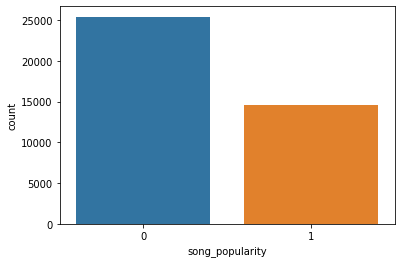

In [119]:
sns.countplot(train['song_popularity'])

In [120]:
train.corr()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
id,1.000000,-0.004428,-0.002733,-0.003237,0.000051,0.001087,-0.001492,-0.004756,0.005135,0.002538,0.002792,-0.001297,-0.002199,-0.001016,-0.003074
song_duration_ms,-0.004428,1.000000,-0.166443,-0.061929,0.148531,-0.024337,0.019354,0.033009,0.152954,-0.017211,-0.001236,0.085490,0.021609,-0.006948,-0.003960
acousticness,-0.002733,-0.166443,1.000000,-0.093737,-0.570177,0.072516,-0.186663,-0.124704,-0.532724,0.066973,-0.130244,-0.190964,-0.205307,-0.250310,0.025298
danceability,-0.003237,-0.061929,-0.093737,1.000000,0.099933,-0.146447,0.120514,0.045400,0.200148,0.030289,0.177937,-0.089887,0.016455,0.384496,0.017572
energy,0.000051,0.148531,-0.570177,0.099933,1.000000,-0.120338,0.210176,0.154907,0.643931,-0.094916,0.120053,0.225465,0.238722,0.324626,-0.054640
instrumentalness,0.001087,-0.024337,0.072516,-0.146447,-0.120338,1.000000,-0.054726,-0.033445,-0.181889,-0.003617,-0.053209,-0.010350,-0.047397,-0.157760,-0.009511
key,-0.001492,0.019354,-0.186663,0.120514,0.210176,-0.054726,1.000000,0.077046,0.201509,-0.036252,0.102993,0.053206,0.094144,0.132194,0.017808
liveness,-0.004756,0.033009,-0.124704,0.045400,0.154907,-0.033445,0.077046,1.000000,0.146551,-0.013281,0.076612,0.064425,0.037766,0.084770,0.016571
loudness,0.005135,0.152954,-0.532724,0.200148,0.643931,-0.181889,0.201509,0.146551,1.000000,-0.076893,0.157550,0.173979,0.245403,0.356330,-0.040662
audio_mode,0.002538,-0.017211,0.066973,0.030289,-0.094916,-0.003617,-0.036252,-0.013281,-0.076893,1.000000,0.019790,-0.023202,-0.043714,-0.015683,-0.001455


In [121]:
train.isnull().sum()

id                     0
song_duration_ms    4101
acousticness        3992
danceability        4026
energy              3975
instrumentalness    3985
key                 4065
liveness            4086
loudness            3957
audio_mode             0
speechiness            0
tempo                  0
time_signature         0
audio_valence          0
song_popularity        0
dtype: int64

(15.0, 0.0)

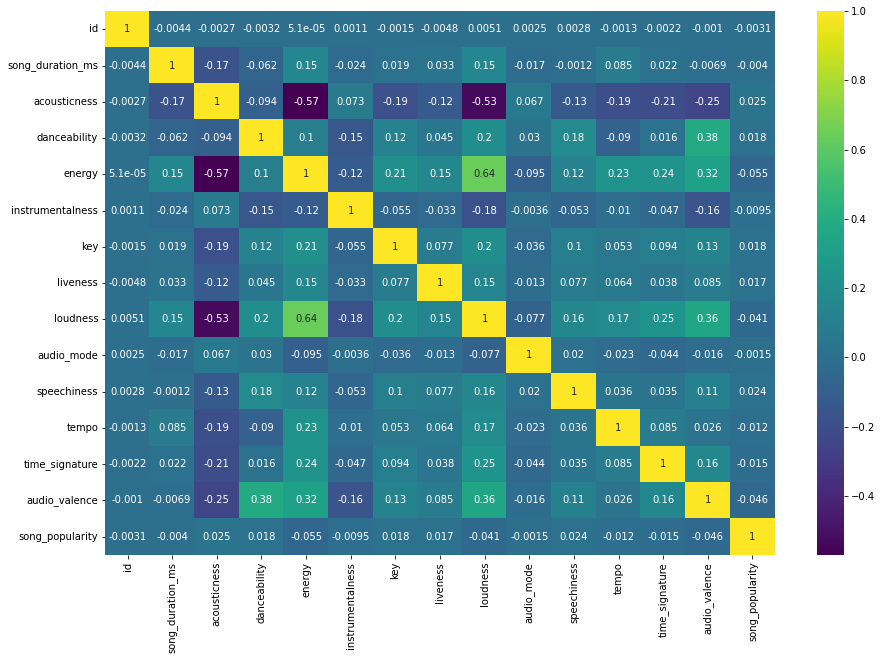

In [122]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True,cmap='viridis')
plt.ylim(15,0)

In [123]:
100*train.isnull().sum()/len(train)

id                   0.0000
song_duration_ms    10.2525
acousticness         9.9800
danceability        10.0650
energy               9.9375
instrumentalness     9.9625
key                 10.1625
liveness            10.2150
loudness             9.8925
audio_mode           0.0000
speechiness          0.0000
tempo                0.0000
time_signature       0.0000
audio_valence        0.0000
song_popularity      0.0000
dtype: float64

In [124]:
col=list(train.columns)
print(col)

['id', 'song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence', 'song_popularity']


In [125]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()

In [126]:
train=pd.DataFrame(my_imputer.fit_transform(train))
train.columns=col

(15.0, 0.0)

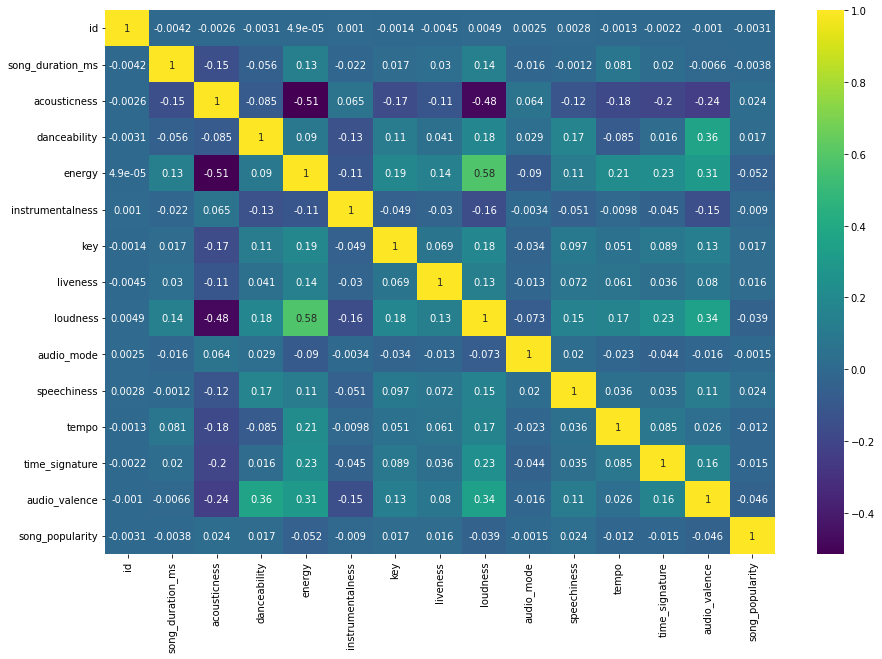

In [127]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True,cmap='viridis')
plt.ylim(15,0)

In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40000 non-null  float64
 1   song_duration_ms  40000 non-null  float64
 2   acousticness      40000 non-null  float64
 3   danceability      40000 non-null  float64
 4   energy            40000 non-null  float64
 5   instrumentalness  40000 non-null  float64
 6   key               40000 non-null  float64
 7   liveness          40000 non-null  float64
 8   loudness          40000 non-null  float64
 9   audio_mode        40000 non-null  float64
 10  speechiness       40000 non-null  float64
 11  tempo             40000 non-null  float64
 12  time_signature    40000 non-null  float64
 13  audio_valence     40000 non-null  float64
 14  song_popularity   40000 non-null  float64
dtypes: float64(15)
memory usage: 4.6 MB


In [129]:
train['song_popularity']

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
39995    0.0
39996    0.0
39997    1.0
39998    0.0
39999    0.0
Name: song_popularity, Length: 40000, dtype: float64

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('song_popularity',axis=1), 
                                                    train['song_popularity'], test_size=0.30, 
                                                    random_state=101)

In [132]:
from sklearn.preprocessing import MinMaxScaler

In [133]:
scaler = MinMaxScaler()

In [134]:
scaler.fit(X_train)

MinMaxScaler()

In [135]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [138]:
predictions = logmodel.predict(X_test)

In [139]:
from sklearn.metrics import classification_report

In [140]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78      7718
         1.0       0.39      0.00      0.01      4282

    accuracy                           0.64     12000
   macro avg       0.52      0.50      0.39     12000
weighted avg       0.55      0.64      0.51     12000



In [141]:
print(confusion_matrix(y_test,predictions))

[[7695   23]
 [4267   15]]
